# Projet Multi_commodity flow

In [1]:
#pip install ortools
from __future__ import print_function
import ortools
import ortools.linear_solver
from ortools.linear_solver import pywraplp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import string
from ortools.graph import pywrapgraph

In [2]:
# Create the linear solver with the GLOP backend.
solver = pywraplp.Solver.CreateSolver('GLOP')

### Création du graph : 

In [48]:
np.random.seed(6)

#taille du graphe en nombre de sommets 
# nombre de sommets
n=7

#nombre de liens
m=10

#création du graphe
def generateGraph(n,m):
    mat=np.zeros(shape=(n,n))
    i=0
    while i<m:
        u= np.random.randint(0,n)
        v= np.random.randint(0,n)
        if u==v:
            continue;
        if mat[u][v]>1:
            continue;
        if np.random.randint(0,2)==0:
            mat[u][v]=10
        else:
            mat[u][v]=20
        i+=1
    # transforme les distances en entier pour les outils google
    mat=mat.astype(int)
    return mat
#création de l'instance et transformation en dataframe si besoin
graph=generateGraph(n,m)
print(graph)
k=9
#création des demandes
def generateDemands(k):
    demands=[]
    i=0
    while i<k:
        s= np.random.randint(0,n)
        t= np.random.randint(0,n)
        if s==t:
            continue;
        demands+=[[s,t,np.random.randint(1,5)]] 
        i+=1
    # transforme les distances en entier pour les outils google
    return demands
demands=generateDemands(k)
print(demands)

[[ 0  0  0  0  0  0  0]
 [10  0  0  0  0  0 10]
 [10 20  0  0  0  0  0]
 [ 0  0 20  0  0 20  0]
 [ 0  0 20  0  0  0 10]
 [ 0 10 20  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
[[5, 6, 1], [3, 5, 1], [4, 3, 2], [5, 2, 3], [6, 0, 2], [6, 2, 3], [2, 3, 2], [3, 1, 3], [3, 6, 2]]


Par exemple ici la première demande va de 5 à 6 et a une capacité de 1. 

In [74]:
np.random.seed(0)

G = nx.DiGraph()

G.add_node('A', demand=-1)
G.add_node('G', demand=1)
G.add_edges_from([('B', 'E')], weight=1)
G.add_edges_from([('D', 'B')], weight=1)
G.add_edges_from([('A', 'D')], weight=2)
G.add_edges_from([('B', 'C')], weight=3)
G.add_edges_from([('E', 'G')], weight=2)
G.add_edges_from([('E', 'C')], weight=3)
G.add_edges_from([('C', 'D')], weight=2)
G.add_edges_from([('D', 'F')], weight=3)
G.add_edges_from([('D', 'E')], weight=2)


edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G, pos, with_labels = True)
plt.draw()

KeyError: 'capacity'

Le cout optimal est : 4
  Arc    Flot / Capacité  Cout
B -> E     0  /   1         0
D -> B     0  /   1         0
A -> D     1  /   2         1
B -> C     0  /   3         0
E -> G     1  /   2         2
E -> C     0  /   3         0
C -> D     0  /   2         0
D -> F     0  /   3         0
D -> E     1  /   2         1
D -> B     0  /   1         0


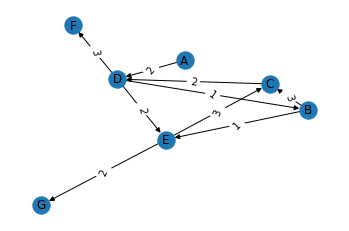

In [60]:
def main():
    arc_depart = [1, 3, 0, 1, 4, 4, 2, 3, 3, 3]
    arc_arrivee = [4, 1, 3, 2, 6, 2, 3, 5, 4, 1]
    cout = [1, 0, 1, 2, 2, 1, 2, 2, 1, 0]
    capa = [1, 1, 2, 3, 2, 3, 2, 3, 2, 1]
    
    offre = [1, 0, 0, 0, 0, 0, -1]

    min_cost_flow = pywrapgraph.SimpleMinCostFlow()

    for i in range(0, len(arc_depart)):
        min_cost_flow.AddArcWithCapacityAndUnitCost(arc_depart[i], arc_arrivee[i],
                                                    capa[i], cout[i])

    for i in range(0, len(offre)):
        min_cost_flow.SetNodeSupply(i, offre[i])

        # Find the minimum cost flow between node 0 and node 4.
    if min_cost_flow.Solve() == min_cost_flow.OPTIMAL:
        print('Le cout optimal est :', min_cost_flow.OptimalCost())
        print('  Arc    Flot / Capacité  Cout')
        for i in range(min_cost_flow.NumArcs()):
            debutArc = string.ascii_uppercase[min_cost_flow.Tail(i)]
            finArc = string.ascii_uppercase[min_cost_flow.Head(i)]
            flot = min_cost_flow.Flow(i)
            capacite = min_cost_flow.Capacity(i)
            cost = flot * min_cost_flow.UnitCost(i)
            print('%1s -> %1s   %3s  / %3s       %3s' % (
                debutArc,
                finArc,
                flot,
                capacite,
                cost))
    else:
        print('Probleme avec le input.')


if __name__ == '__main__':
    main()

nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G, pos, with_labels = True)
plt.draw()

In [61]:
# Permet d'afficher le plus court chemin entre A et G
nx.shortest_path(G,'A','G')

['A', 'D', 'E', 'G']

In [62]:
# Permet de faire apparaître tous les chemins qui existent entre s1 et t1
for path in nx.all_simple_paths(G, source='A', target='G'):
    print(path)

['A', 'D', 'B', 'E', 'G']
['A', 'D', 'E', 'G']


In [63]:
nx.min_cost_flow(G)

{'A': {'D': 1},
 'G': {},
 'B': {'E': 0, 'C': 0},
 'E': {'G': 1, 'C': 0},
 'D': {'B': 0, 'F': 0, 'E': 1},
 'C': {'D': 0},
 'F': {}}

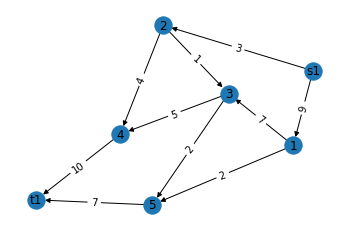

In [58]:
np.random.seed(0)

G = nx.DiGraph()

G.add_node("s1", demand=-7)
G.add_node("t1", demand=7)
G.add_edges_from([('s1', '1')], weight=9, capacity=10)
G.add_edges_from([('s1', '2')], weight=3, capacity=4)
G.add_edges_from([('1', '3')], weight=7, capacity=8)
G.add_edges_from([('1', '5')], weight=2, capacity=3)
G.add_edges_from([('2', '3')], weight=1, capacity=2)
G.add_edges_from([('2', '4')], weight=4, capacity=7)
G.add_edges_from([('3', '4')], weight=5, capacity=6)
G.add_edges_from([('3', '5')], weight=2, capacity=4)
G.add_edges_from([('5', 't1')], weight=7, capacity=8)
G.add_edges_from([('4', 't1')], weight=10, capacity=11)


edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G, pos, with_labels = True)
plt.draw()

In [7]:
# Permet d'afficher le plus court chemin entre s1 et t1
nx.shortest_path(G,'s1','t1')

['s1', '1', '5', 't1']

In [8]:
# Permet de faire apparaître tous les chemins qui existent entre s1 et t1
for path in nx.all_simple_paths(G, source='s1', target='t1'):
    print(path)

['s1', '1', '3', '4', 't1']
['s1', '1', '3', '5', 't1']
['s1', '1', '5', 't1']
['s1', '2', '3', '4', 't1']
['s1', '2', '3', '5', 't1']
['s1', '2', '4', 't1']


In [9]:
nx.min_cost_flow(G)

{'s1': {'1': 3, '2': 4},
 't1': {},
 '1': {'3': 0, '5': 3},
 '2': {'3': 2, '4': 2},
 '3': {'4': 0, '5': 2},
 '5': {'t1': 5},
 '4': {'t1': 2}}

### Code Samy

In [18]:
def main():
    arc_depart = [0, 0, 1, 1, 1, 2, 2, 3, 4]
    arc_arrivee = [1, 2, 2, 3, 4, 3, 4, 4, 2]
    cout = [4, 4, 2, 2, 6, 1, 3, 2, 3]
    capa = [15, 8, 20, 4, 10, 15, 4, 20, 5]
    
    offre = [20, 0, 0, -5, -15]

    min_cost_flow = pywrapgraph.SimpleMinCostFlow()

    for i in range(0, len(arc_depart)):
        min_cost_flow.AddArcWithCapacityAndUnitCost(arc_depart[i], arc_arrivee[i],
                                                    capa[i], cout[i])

    for i in range(0, len(offre)):
        min_cost_flow.SetNodeSupply(i, offre[i])

        # Find the minimum cost flow between node 0 and node 4.
    if min_cost_flow.Solve() == min_cost_flow.OPTIMAL:
        print('Le cout optimal est :', min_cost_flow.OptimalCost())
        print('  Arc    Flot / Capacité  Cout')
        for i in range(min_cost_flow.NumArcs()):
            debutArc = string.ascii_uppercase[min_cost_flow.Tail(i)]
            finArc = string.ascii_uppercase[min_cost_flow.Head(i)]
            flot = min_cost_flow.Flow(i)
            capacite = min_cost_flow.Capacity(i)
            cost = flot * min_cost_flow.UnitCost(i)
            print('%1s -> %1s   %3s  / %3s       %3s' % (
                debutArc,
                finArc,
                flot,
                capacite,
                cost))
    else:
        print('Probleme avec le input.')


if __name__ == '__main__':
    main()

Le cout optimal est : 150
  Arc    Flot / Capacité  Cout
A -> B    12  /  15        48
A -> C     8  /   8        32
B -> C     8  /  20        16
B -> D     4  /   4         8
B -> E     0  /  10         0
C -> D    12  /  15        12
C -> E     4  /   4        12
D -> E    11  /  20        22
E -> C     0  /   5         0


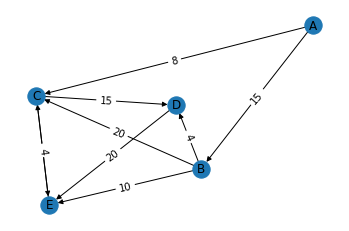

In [78]:
np.random.seed(4)

G = nx.DiGraph()

G.add_node('A', demand=-20)
G.add_node('D', demand=5)
G.add_node('E', demand=15)
G.add_edges_from([('A', 'B')], weight=1, capacity=15)
G.add_edges_from([('A', 'C')], weight=1, capacity=8)
G.add_edges_from([('B', 'C')], weight=2, capacity=20)
G.add_edges_from([('B', 'D')], weight=3, capacity=4)
G.add_edges_from([('B', 'E')], weight=2, capacity=10)
G.add_edges_from([('C', 'D')], weight=3, capacity=15)
G.add_edges_from([('C', 'E')], weight=2, capacity=4)
G.add_edges_from([('D', 'E')], weight=3, capacity=20)
G.add_edges_from([('E', 'C')], weight=2, capacity=5)


edge_labels=dict([((u,v,),d['capacity'])
                 for u,v,d in G.edges(data=True)])

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G, pos, with_labels = True)
plt.draw()

In [90]:
# Permet d'afficher le plus court chemin entre A et D
print('Plus court chemin entre A et D : ')
print(nx.shortest_path(G,'A','D'))
# Permet d'afficher le plus court chemin entre A et D
print('Plus court chemin entre A et E : ')
print(nx.shortest_path(G,'A','E'))

Plus court chemin entre A et D : 
['A', 'B', 'D']
Plus court chemin entre A et E : 
['A', 'B', 'E']


In [89]:
# Permet de faire apparaître tous les chemins qui existent entre A et D
print('Tous les chemins qui existent entre A et D : ')
for path in nx.all_simple_paths(G, source='A', target='D'):
    print(path)
# Permet de faire apparaître tous les chemins qui existent entre A et E
print('Tous les chemins qui existent entre A et E : ')
for path in nx.all_simple_paths(G, source='A', target='E'):
    print(path)

Tous les chemins qui existent entre A et D : 
['A', 'B', 'C', 'D']
['A', 'B', 'D']
['A', 'B', 'E', 'C', 'D']
['A', 'C', 'D']
Tous les chemins qui existent entre A et E : 
['A', 'B', 'C', 'D', 'E']
['A', 'B', 'C', 'E']
['A', 'B', 'D', 'E']
['A', 'B', 'E']
['A', 'C', 'D', 'E']
['A', 'C', 'E']


In [91]:
nx.min_cost_flow(G)

{'A': {'B': 12, 'C': 8},
 'D': {'E': 1},
 'E': {'C': 0},
 'B': {'C': 0, 'D': 2, 'E': 10},
 'C': {'D': 4, 'E': 4}}